In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Get the data and pre-process the data

In [13]:
df = pd.read_csv('../data/data_ready.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,1,1,6,5,1960,1960,4.727388,3,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.360741,1,1,5,6,1961,1961,0.000000,3,...,0,0,0,1,0,0,0,0,1,0
2,4.406719,9.565775,1,1,6,6,1958,1958,4.691348,3,...,0,0,0,1,0,0,0,0,1,0
3,4.543295,9.320181,1,1,7,5,1968,1968,0.000000,4,...,0,0,0,1,0,0,0,0,1,0
4,4.317488,9.534668,1,1,5,5,1997,1998,0.000000,3,...,0,0,0,1,0,0,0,0,1,0


In [14]:
y = df.SalePrice.values
X = df[['GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF']].values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 5)
y shape: (2930,)


In [15]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [16]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [17]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [18]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### Linear Regression without Regularization

alpha: 0, rmse_val: 0.1647707449265976
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.18363835951183716
R2: 0.7949556435680843


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


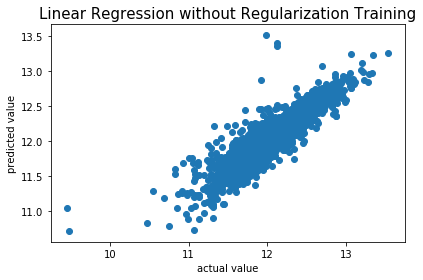

Validation:
RMSE: 0.1647707449265976
R2: 0.842964822725141


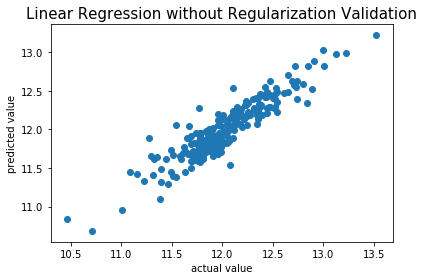

Test:
RMSE: 0.1794944141818158
R2: 0.810030315221794


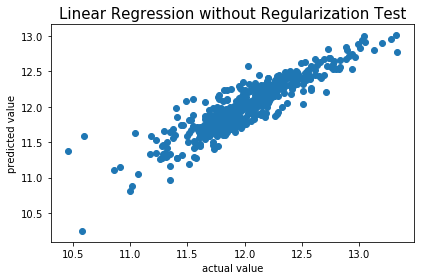

In [19]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.16477074492600224
alpha: 2.25e-07, rmse_val: 0.16477074492570454
alpha: 3.375e-07, rmse_val: 0.16477074492525803
alpha: 5.0625e-07, rmse_val: 0.1647707449245882
alpha: 7.593749999999999e-07, rmse_val: 0.16477074492358343
alpha: 1.1390625e-06, rmse_val: 0.16477074492207633
alpha: 1.70859375e-06, rmse_val: 0.1647707449198156
alpha: 2.562890625e-06, rmse_val: 0.16477074491642488
alpha: 3.8443359375e-06, rmse_val: 0.1647707449113384
alpha: 5.766503906249999e-06, rmse_val: 0.1647707449037088
alpha: 8.649755859375e-06, rmse_val: 0.16477074489226445
alpha: 1.29746337890625e-05, rmse_val: 0.1647707448750985
alpha: 1.946195068359375e-05, rmse_val: 0.1647707448493497
alpha: 2.9192926025390623e-05, rmse_val: 0.16477074481072795
alpha: 4.3789389038085936e-05, rmse_val: 0.16477074475279835
alpha: 6.56840835571289e-05, rmse_val: 0.16477074466591024
alpha: 9.852612533569336e-05, rmse_val: 0.16477074453559246
alpha: 0.00014778918800354004, rmse_val: 0.16477074434014866
alph

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


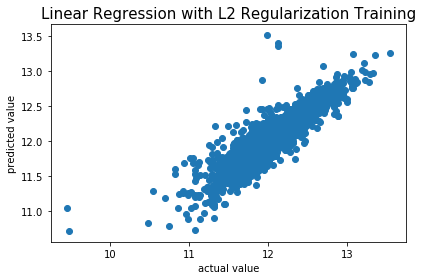

Validation:
RMSE: 0.16477025973170126
R2: 0.8429657475562378


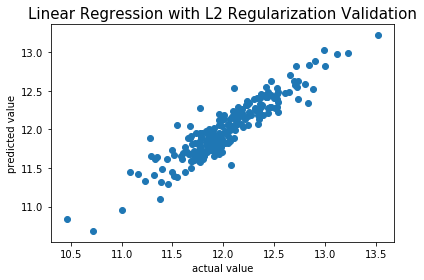

Test:
RMSE: 0.17948501340261583
R2: 0.8100502135156027


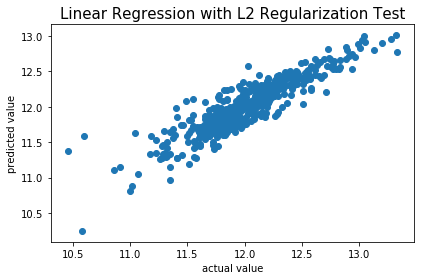

In [20]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.16477074958183413
alpha: 2.25e-07, rmse_val: 0.16477075782145473
alpha: 3.375e-07, rmse_val: 0.16477075674457065
alpha: 5.0625e-07, rmse_val: 0.16477077727631403
alpha: 7.593749999999999e-07, rmse_val: 0.164770774846601
alpha: 1.1390625e-06, rmse_val: 0.16477077123046738
alpha: 1.70859375e-06, rmse_val: 0.1647707658702491
alpha: 2.562890625e-06, rmse_val: 0.16477075797387986
alpha: 3.8443359375e-06, rmse_val: 0.16477074645323295
alpha: 5.766503906249999e-06, rmse_val: 0.16477072990105307
alpha: 8.649755859375e-06, rmse_val: 0.16477070671256233
alpha: 1.29746337890625e-05, rmse_val: 0.1647706756193315
alpha: 1.946195068359375e-05, rmse_val: 0.16477063728087607
alpha: 2.9192926025390623e-05, rmse_val: 0.16477059845133546
alpha: 4.3789389038085936e-05, rmse_val: 0.1647705822328727
alpha: 6.56840835571289e-05, rmse_val: 0.16477065246334813
alpha: 9.852612533569336e-05, rmse_val: 0.16477097056455764
alpha: 0.00014778918800354004, rmse_val: 0.1647719264128239
alph

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


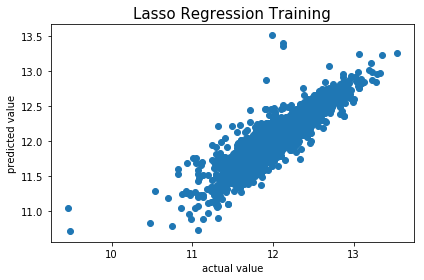

Validation:
RMSE: 0.1647705822328727
R2: 0.8429651328363239


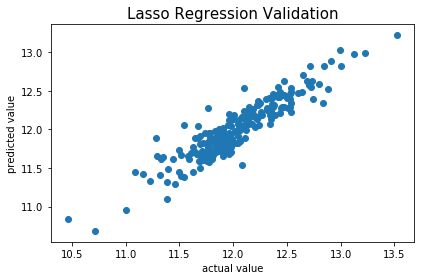

Test:
RMSE: 0.1794933738360497
R2: 0.8100325173358309


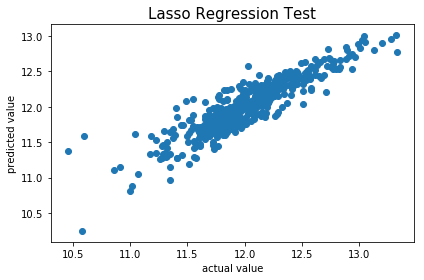

In [21]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

C: 1.500e-01, epsilon: 1.200e-03, rmse_val: 0.14822245165671527
C: 2.250e-01, epsilon: 1.200e-03, rmse_val: 0.14604897947091372
C: 3.375e-01, epsilon: 1.200e-03, rmse_val: 0.1451143018699238
C: 5.062e-01, epsilon: 1.200e-03, rmse_val: 0.14519951171506248
C: 7.594e-01, epsilon: 1.200e-03, rmse_val: 0.14633479496617294
C: 1.139e+00, epsilon: 1.200e-03, rmse_val: 0.1459640252010777
C: 1.709e+00, epsilon: 1.200e-03, rmse_val: 0.14668918657611743
C: 2.563e+00, epsilon: 1.200e-03, rmse_val: 0.1463041789803374
C: 3.844e+00, epsilon: 1.200e-03, rmse_val: 0.1464454428442215
SVR(C=0.3375, cache_size=200, coef0=0.0, degree=3, epsilon=0.0012,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
Training:
RMSE: 0.16288302483421396
R2: 0.8386857760419906


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


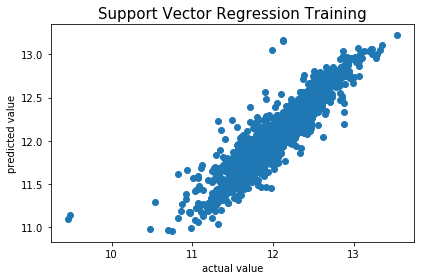

Validation:
RMSE: 0.1451143018699238
R2: 0.8781972278979515


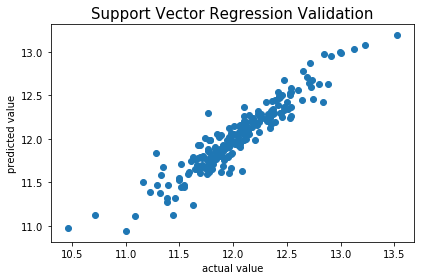

Test:
RMSE: 0.16439394898662452
R2: 0.8406492609335598


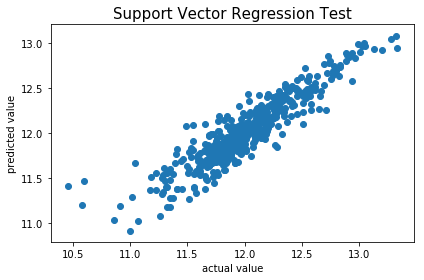

In [32]:
from sklearn.svm import SVR
Cs = [0.1*(1.5**i) for i in range(1, 10)]
epsilons = [0.0012]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
    model = SVR(kernel='rbf', C=C, epsilon=epsilon)
    model.fit(X_trn, y_trn)
    rmse_val = metric.rmse(y_val, model.predict(X_val))
    print("C: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, epsilon, rmse_val))
    if best_rmse is None or rmse_val < best_rmse:
      best_rmse = rmse_val
      best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

### Random Forest

n_estimators: 1000, rmse_val: 0.1522119361352122
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.06215869335000455
R2: 0.976507741850878


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


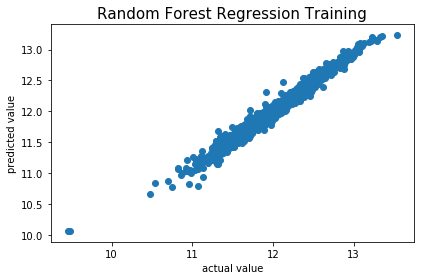

Validation:
RMSE: 0.1522119361352122
R2: 0.8659909404928817


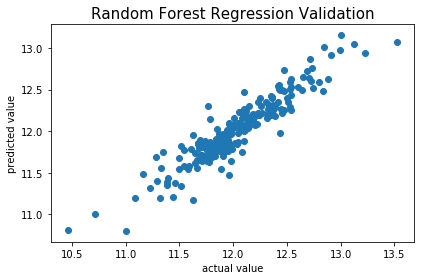

Test:
RMSE: 0.17133906667320628
R2: 0.8269007365925375


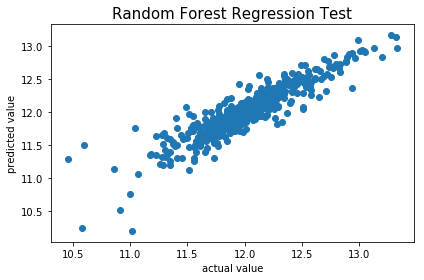

In [26]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [1000]

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators=n_estimators)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("n_estimators: {}, rmse_val: {}".format(n_estimators, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")